## 개요 
Kaggle Korea - House price prediction 실습 기록용으로 남깁니다.

[Kaggle 원문 링크](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr)

## 개념

**RMSE(Root Mean Squeare Error)**
```
Root    (4)
Mean    (3)
Square  (2)
Error   (1)
(1) 실제값에서 예측값을 뺀 '오차'를
(2) 합했을 때 음수의 영향을 제거하기 위해 '제곱'하고
(3) '평균'오차로 만든 후
(4) '루트'를 씌워 값의 크기를 작게 한다 (값을 작게하여 연산속도에 이점이 있다)
```


## 파일 다운로드 및 알아보기
**File descriptions**

train.csv - 예측 모델을 만들기 위해 사용하는 학습 데이터입니다. 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있습니다.

test.csv - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터 입니다.

sample_submission.csv - 제출시 사용할 수 있는 예시 submission.csv 파일입니다.

**Data fields**

ID : 집을 구분하는 번호

date : 집을 구매한 날짜

price : 집의 가격(Target variable)

bedrooms : 침실의 수

bathrooms : 화장실의 수

sqft_living : 주거 공간의 평방 피트(면적)

sqft_lot : 부지의 평방 피트(면적)

floors : 집의 층 수

waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)

view : 집이 얼마나 좋아 보이는지의 정도

condition : 집의 전반적인 상태

grade : King County grading 시스템 기준으로 매긴 집의 등급

sqft_above : 지하실을 제외한 평방 피트(면적)

sqft_basement : 지하실의 평방 피트(면적)

yr_built : 지어진 년도

yr_renovated : 집을 재건축한 년도

zipcode : 우편번호

lat : 위도

long : 경도

sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

## 패키지 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data_path = './data/train.csv'
test_data_path = './data/test.csv'

data = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
print('train data : {}'.format(data.shape))
print('test data : {}'.format(test.shape))

train data : (15035, 21)
test data : (6555, 20)


## 데이터 전처리

### 정답컬럼 분리
* test데이터와 달리 train data에는 컬럼이 1개 더 있음 (정답컬럼인 price)
* 별도의 정답 데이터(y)로 분리

In [2]:
print('컬럼 분리 전')
print(data.columns)
print(test.columns)

컬럼 분리 전
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [3]:
# y라는 변수에 price(정답)을 옮기고, 전체데이터를 백업(data_backup에 할당)하고 price컬럼 삭제
y = data['price'] 
data_backup = data.copy()
data.drop('price',axis=1, inplace=True)

In [4]:
print('컬럼 분리 후')
print(data.columns)
print(test.columns)
print(y.name)

컬럼 분리 후
Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
price


### 결측치 확인 및 제거
* train, test 데이터를 합쳐서 한번에 확인

In [43]:
# 합치기
df_chk_missing = pd.concat((data, test), axis=0)

# 향후 분할을 대비한 행 수 저장
train_length = len(data)
test_length = len(test)

print(train_length, test_length)

15035 6555


#### 결측치 확인방법1(pandas)
* isna()로 결측치를 확인

In [44]:
print(df_chk_missing.isna().sum())

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


#### 결측치 확인방법2(missingno)
* missingno 패키지로 컬럼별 결측치 시각화

<Axes: >

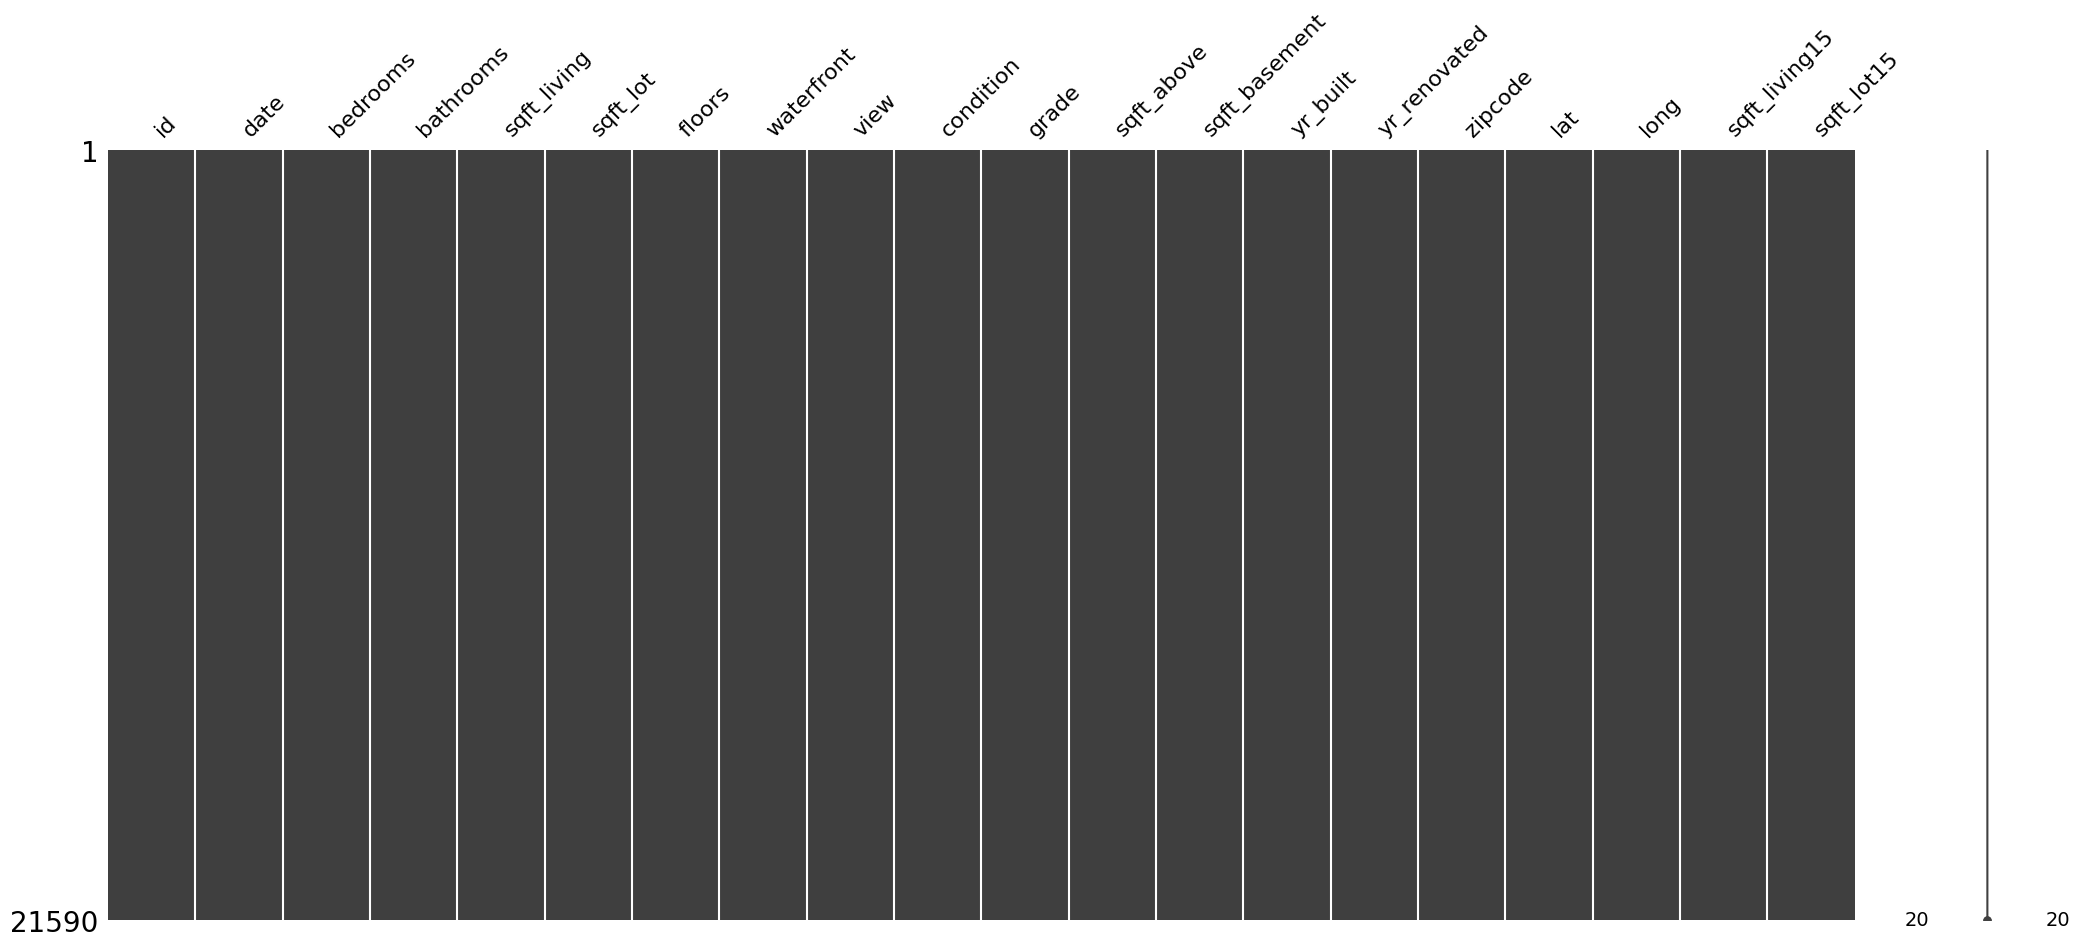

In [29]:
import missingno

missingno.matrix(df_chk_missing)

#### 결측치 확인방법3(ydata_profiling)
* ydata_profiling 패키지로 결측치 및 다양한 값 확인 가능
* 렌더링 용량 문제로 실행결과는 이미지로 대체(RangeError: Maximum call stack size exceeded)

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_chk_missing, title="Profiling Report")
profile

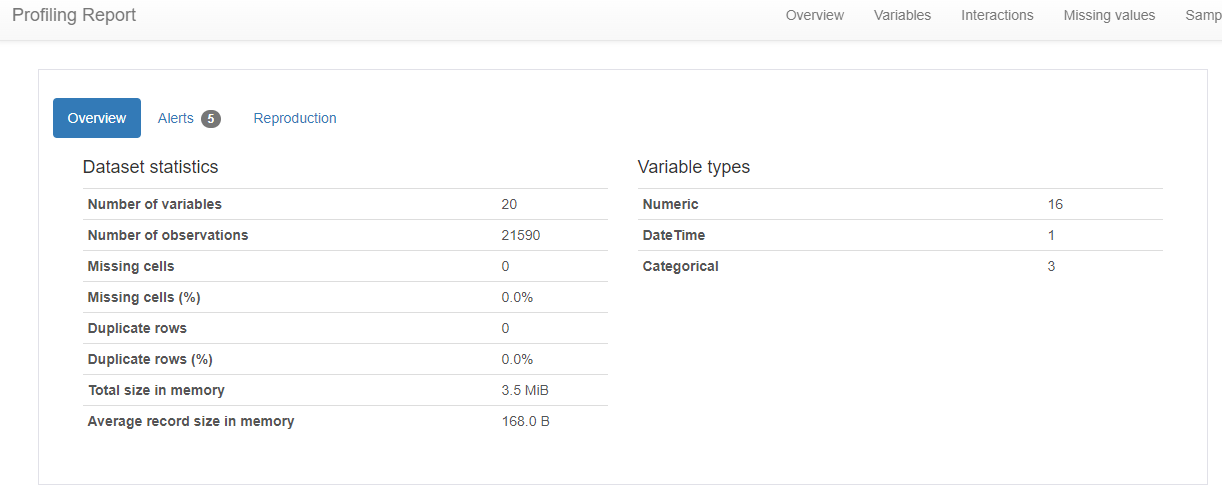

* 결측치가 없으므로 다음 과정을 진행

### 불필요한 변수 제거, 데이터 변환 등

#### 단순식별용 데이터 삭제
* 가격과 관계없는 단순식별용 데이터인 id 삭제

In [45]:
main_id = df_chk_missing['id'][:train_length]
test_id = df_chk_missing['id'][train_length:]
del df_chk_missing['id']

#### 불필요한 데이터 삭제
* 날짜 뒤에 T00000과 같이 시간데이터(로 추정됨)가 있는데, 모두 T00000으로만 되어있으므로 삭제

In [46]:
# T000000으로 되어있는 값 세기
df_chk_missing['date'].str.contains('T000000').value_counts()

date
True    21590
Name: count, dtype: int64

In [47]:
# apply로 lambda함수를 사용하여, date컬럼의 앞자리만 저장
df_chk_missing['date'] = df_chk_missing['date'].apply(lambda x : str(x[:6]))
df_chk_missing.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


#### 로그변환
* 치우친 분포를 정규분포에 가깝게 만들기

##### 분포가 치우쳐져 있는 항목 찾기(시각화)

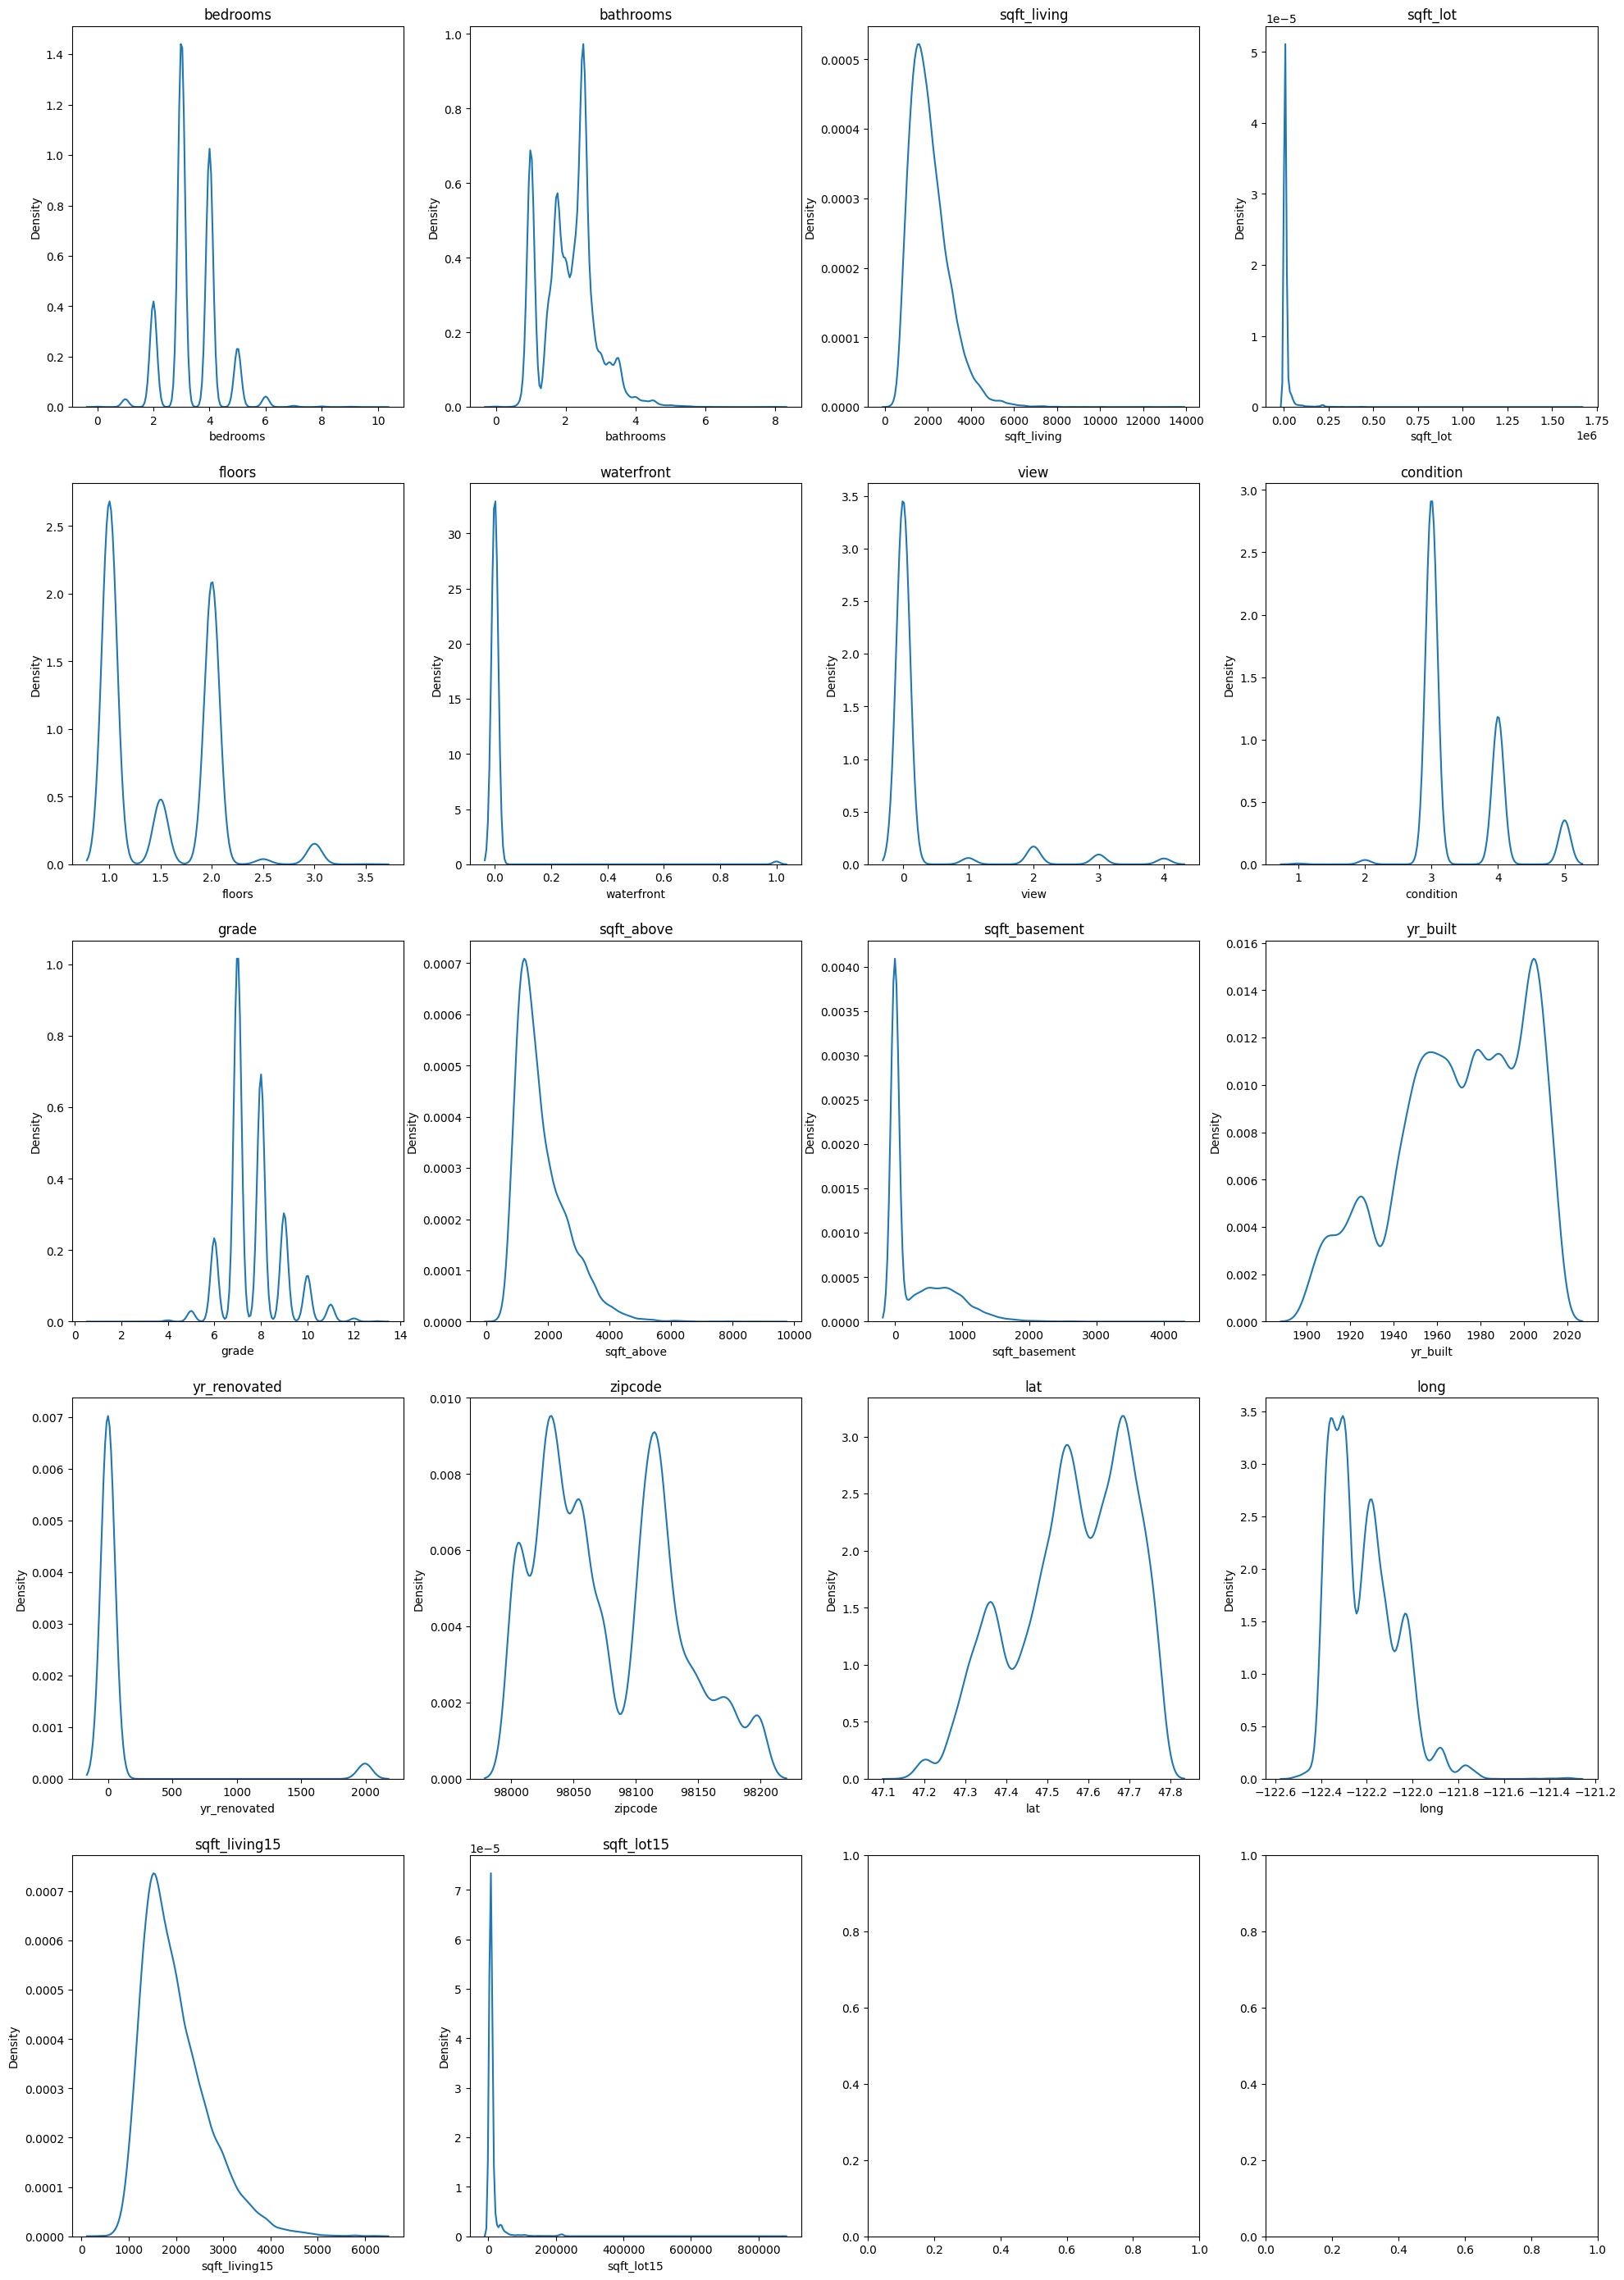

In [49]:
row_plot = 5
col_plot = 4
fig, ax = plt.subplots(row_plot, col_plot, figsize=(24, 35)) 

columns = df_chk_missing.columns
columns_idx = 1 # 첫 컬럼인 date(날짜)는 제외하기 위해 0이 아닌 1부터 시작
for row in range(row_plot):
    for col in range(col_plot):
        sns.kdeplot(data=df_chk_missing[columns[columns_idx]], ax=ax[row][col])
        ax[row][col].set_title(columns[columns_idx])
        columns_idx += 1
        if columns_idx == len(columns) :
            break

* 아래의 항목들이 치우쳐져 있음
  * sqft_living
  * sqft_lot
  * waterfront (→유/무 지표로 0,1만 있는게 정상이므로 제외)
  * sqft_above
  * sqft_basement
  * sqft_living15
  * sqft_lot15

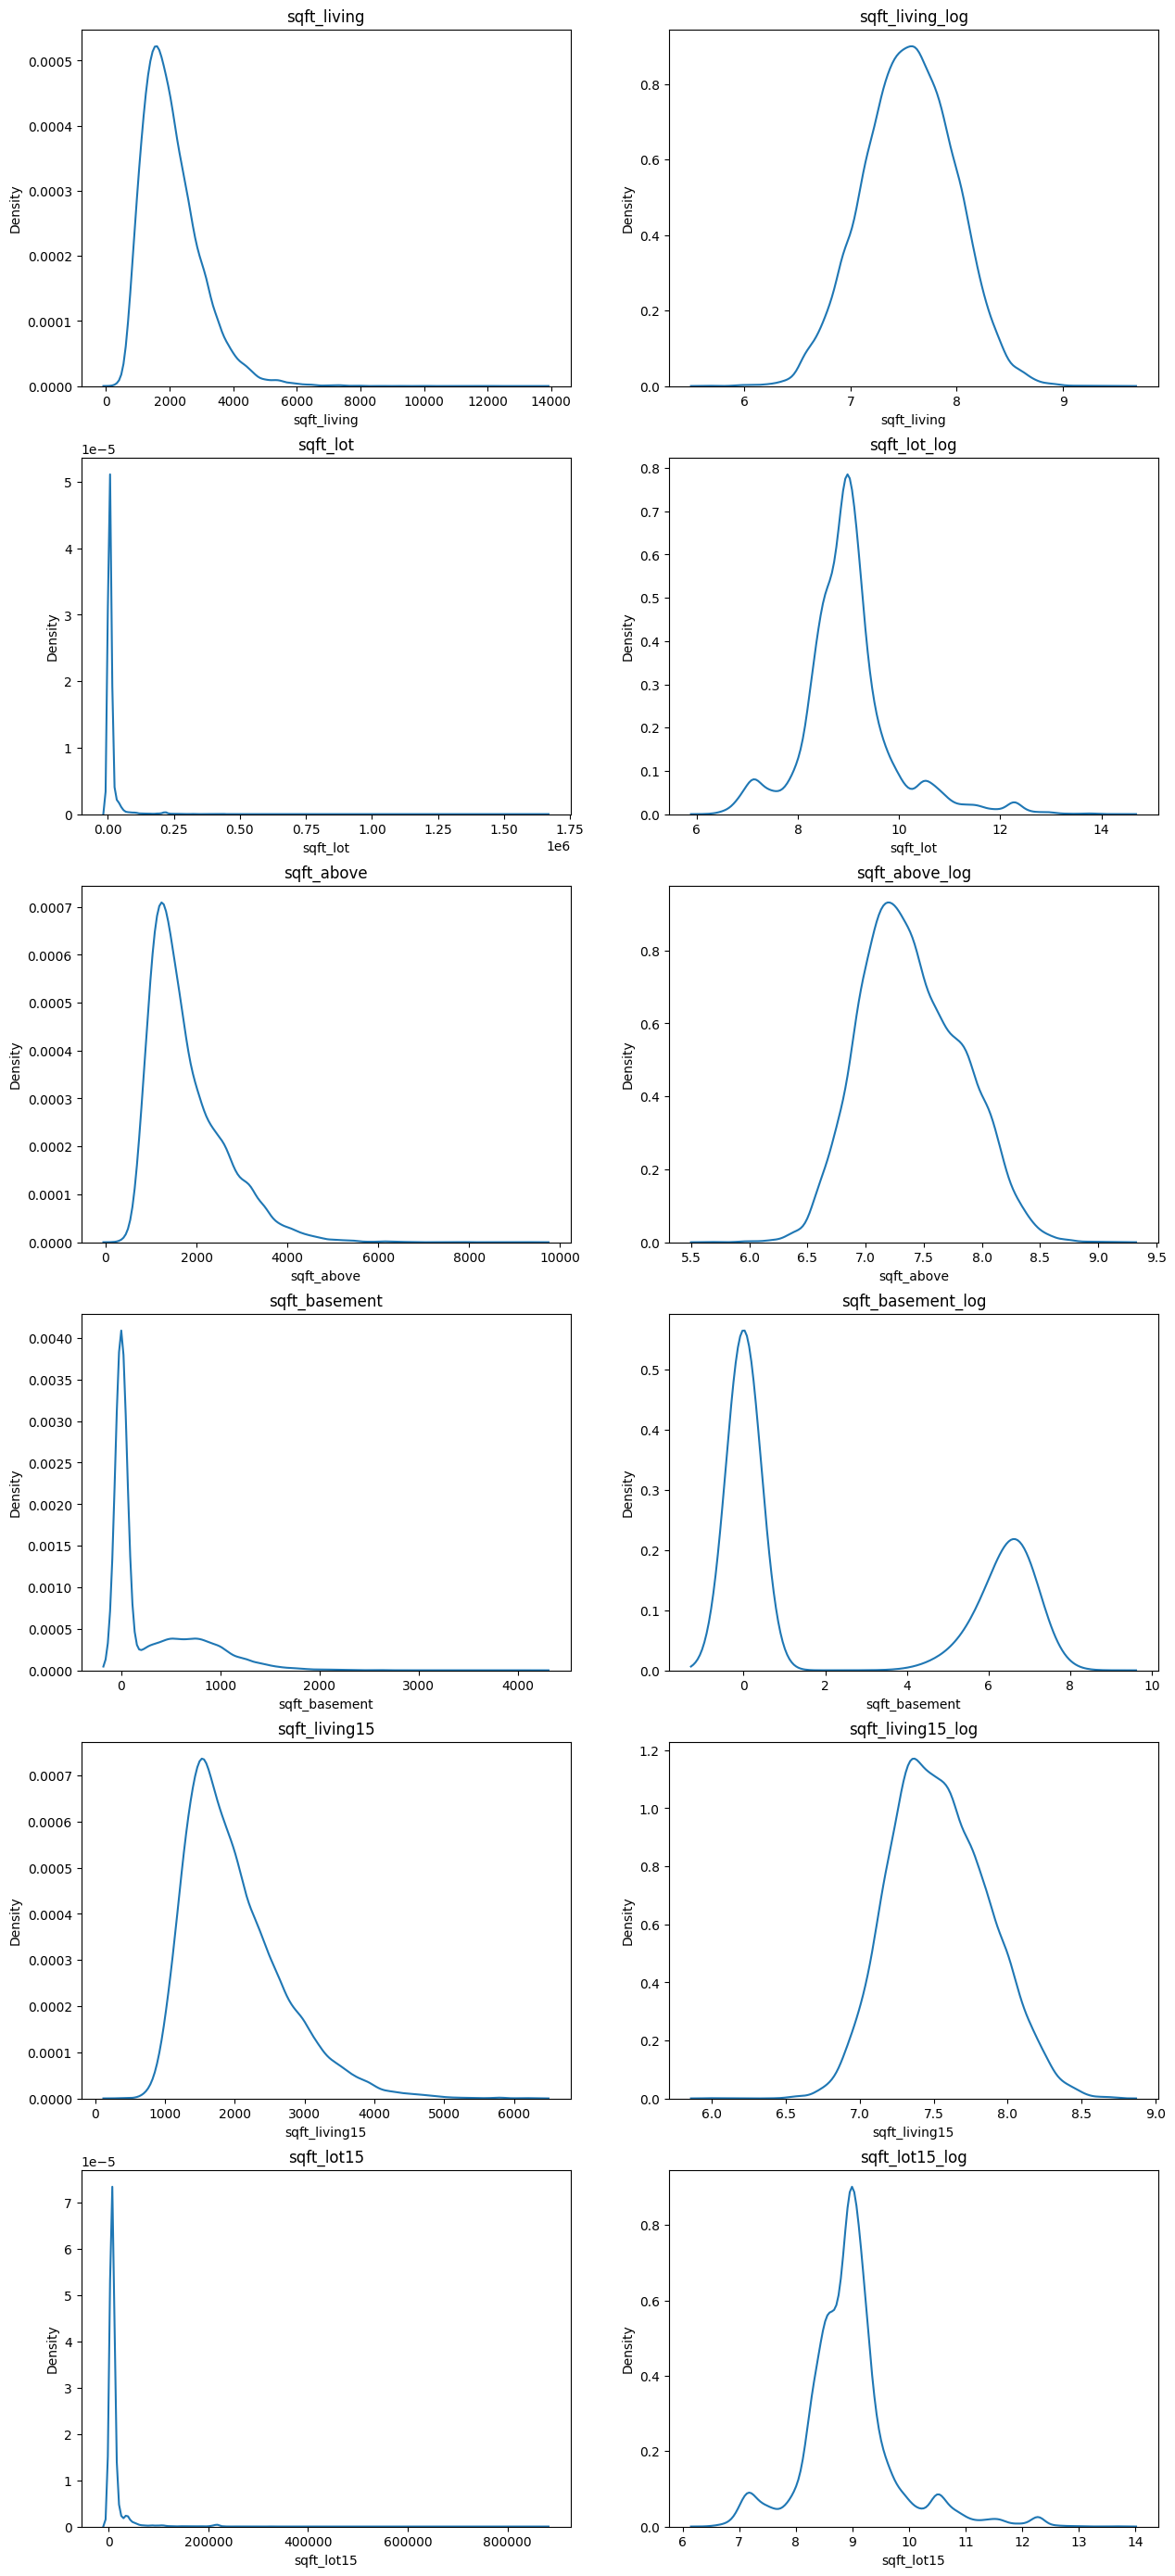

In [50]:
# 변환대상 리스트에 저장
skewed_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# 그래프로 그리기 (변환 전/후 그래프를 함께 그릴 예정이므로 plot의 수는 두배)
row_plot = 6
col_plot = 2
fig, ax = plt.subplots(row_plot, col_plot, figsize=(15, 35)) 

columns = skewed_columns
columns_idx = 0


for row in range(row_plot):
    # 로그변환 대상만 식별 후 진행
    if columns[row] in skewed_columns:
        # 기존 그래프 그리기
        sns.kdeplot(data=df_chk_missing[columns[row]], ax=ax[row][0])
        ax[row][0].set_title(columns[row])

        # 로그변환
        df_chk_missing[columns[row]] = np.log1p(df_chk_missing[columns[row]])

        # 변환된 그래프 그리기
        sns.kdeplot(data=df_chk_missing[columns[row]], ax=ax[row][1])
        ax[row][1].set_title(columns[row]+'_log')

#### train, test 데이터로 정리

In [81]:
preprocessed_train = df_chk_missing[:train_length].copy()
preprocessed_test = df_chk_missing[train_length:].copy()
price_train = y.copy()

# date(날짜)의 타입을 int로 변경 (변경하지 않는 경우 object타입으로 인한 오류 발생)
preprocessed_train['date'] = preprocessed_train['date'].astype(int)
preprocessed_test['date'] = preprocessed_test['date'].astype(int)

print(preprocessed_train.shape)
print(preprocessed_test.shape)

(15035, 19)
(6555, 19)


## Scikit-learn 등 관련 패키지 불러오기
* 본래 사용하는 패키지는 모두 최상단에서 불러오는게 맞음!

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

### 모델 불러오고 Cross Validation으로 모델성능 측청

In [ ]:
gboost = GradientBoostingRegressor(random_state=1210)
xgboost = xgb.XGBRegressor(random_state=1210)
lightgbm = lgb.LGBMRegressor(random_state=1210)

model_dict = {'GradientBoosting':gboost,
              'XGBoost':xgboost,
              'LigntGBM':lightgbm}

# LightGBM의 메시지가 나오지 않도록 별도로 저장 후 출력
model_cv_score = dict()
for model in model_dict.keys():
    model_cv_score[model] = np.mean(cross_val_score(model_dict[model], X=preprocessed_train, y=price_train))

In [86]:
for model in model_dict.keys():
    print(f'{model} : {model_cv_score[model]}')

GradientBoosting : 0.8613647608814923
XGBoost : 0.8762617283884332
LigntGBM : 0.8818569800403846


### 모델학습 및 예측
* Score가 가장 높았던 lightGBM으로 진행해보기

In [87]:
model_dict['LigntGBM'].fit(preprocessed_train.values, y)
prediction = model_dict['LigntGBM'].predict(preprocessed_test.values)
prediction

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 540682.653143


array([1296687.09405506,  311847.90404507,  806735.28228208, ...,
       1726006.82963994,  395020.94053356,  333594.29000994])

### 제출용 DataFrame 및 csv파일 생성

In [88]:
df_submission = pd.DataFrame({'id' : test_id, 
                              'price' : prediction})
df_submission

,id,price
0,15208,1.296687e+06
1,15209,3.118479e+05
2,15210,8.067353e+05
3,15211,2.098083e+05
4,15212,4.343237e+05
...,...,...
6550,21758,4.230647e+05
6551,21759,5.111171e+05
6552,21760,1.726007e+06
6553,21761,3.950209e+05


In [ ]:
df_submission.to_csv('submission.csv', index=False)